In [40]:
library(igraph)
library('Matrix')
library('pracma')
library("matrixStats")

In [56]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [57]:
g2_2 <- barabasi.game(1000, directed=F, m=1)

In [58]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
    v = start_node
    re = rep(0, num_steps)
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        re[i] <- v
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF) 
    }
    
    return(re)
}

In [64]:
set.seed(1)
result <- matrix(0, 200, 2000)
for (s in 1:200) {
    sv <- sample(1:vcount(g2_2), 1)
    v <- random_walk(g2_2, 2000, sv)
    for (i in 1:2000) {
        result[s, i] = distances(g2_2, sv, v[i])
    }
}

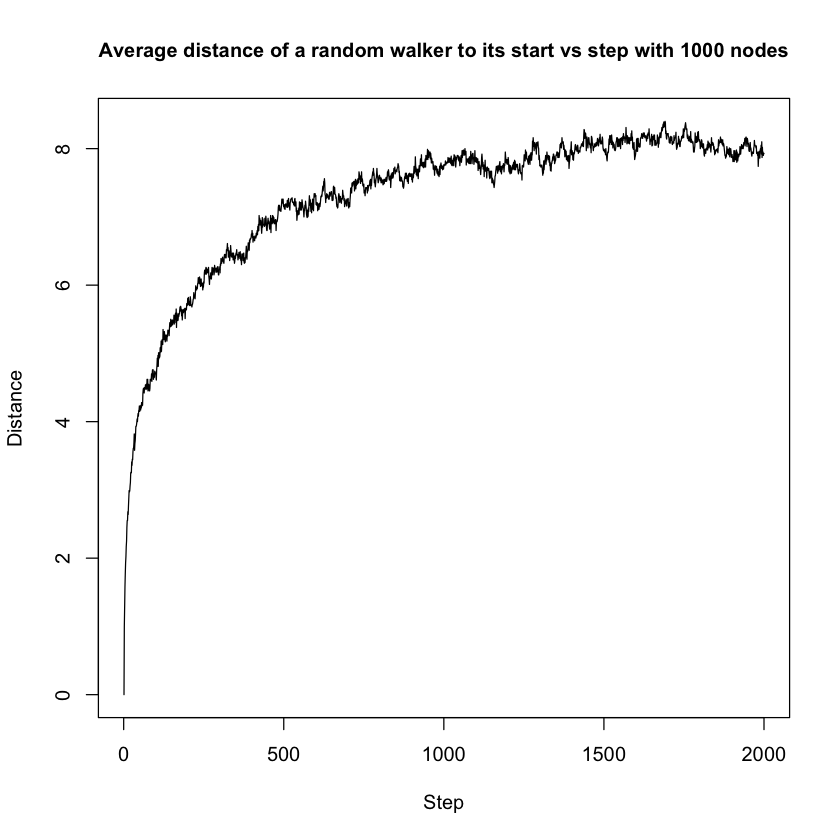

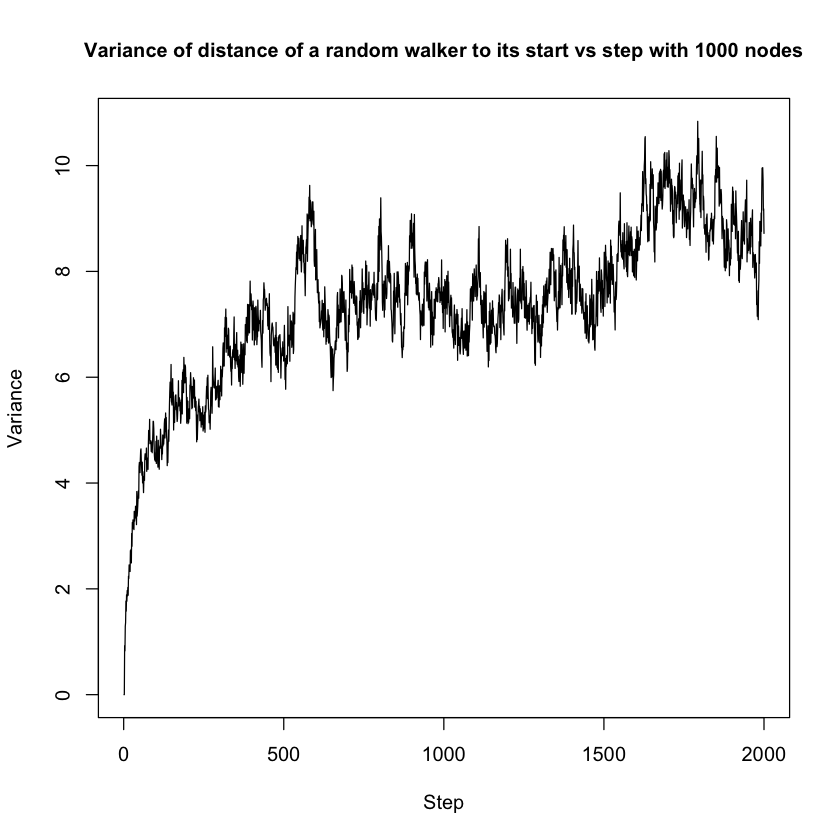

In [79]:
plot(colMeans(result),main="Average distance of a random walker to its start vs step with 1000 nodes",xlab="Step",ylab="Distance",type='l',cex.main=1)
plot(colVars(result), main="Variance of distance of a random walker to its start vs step with 1000 nodes",xlab="Step",ylab="Variance",type='l',cex.main=1)

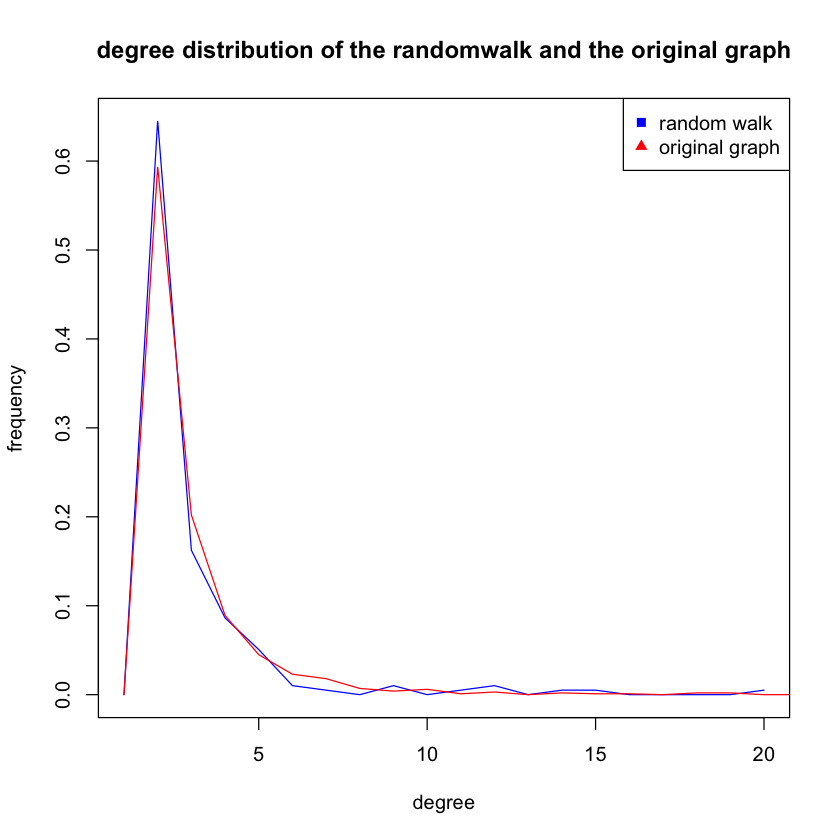

In [112]:
v4 <- random_walk(g2_2, 2000, sample(1:vcount(g2_2), 1))
plot(degree.distribution(induced.subgraph(g2_2, v4)), type='l', col="blue", main="degree distribution of the randomwalk and the original graph",xlab="degree",ylab="frequency")
lines(degree.distribution(g2_2), col="red")
legend(legend=c("random walk", "original graph"), col=c("blue", "red"), "topright", pch=c(15, 17))

In [80]:
g2_4_1 <- barabasi.game(100, directed=F, m=1)
set.seed(1)
result_4_1 <- matrix(0, 200, 2000)
for (s in 1:200) {
    sv_1 <- sample(1:vcount(g2_4_1), 1)
    v2 <- random_walk(g2_4_1, 2000, sv_1)
    for (i in 1:2000) {
        result_4_1[s, i] = distances(g2_4_1, sv_1, v2[i])
    }
}

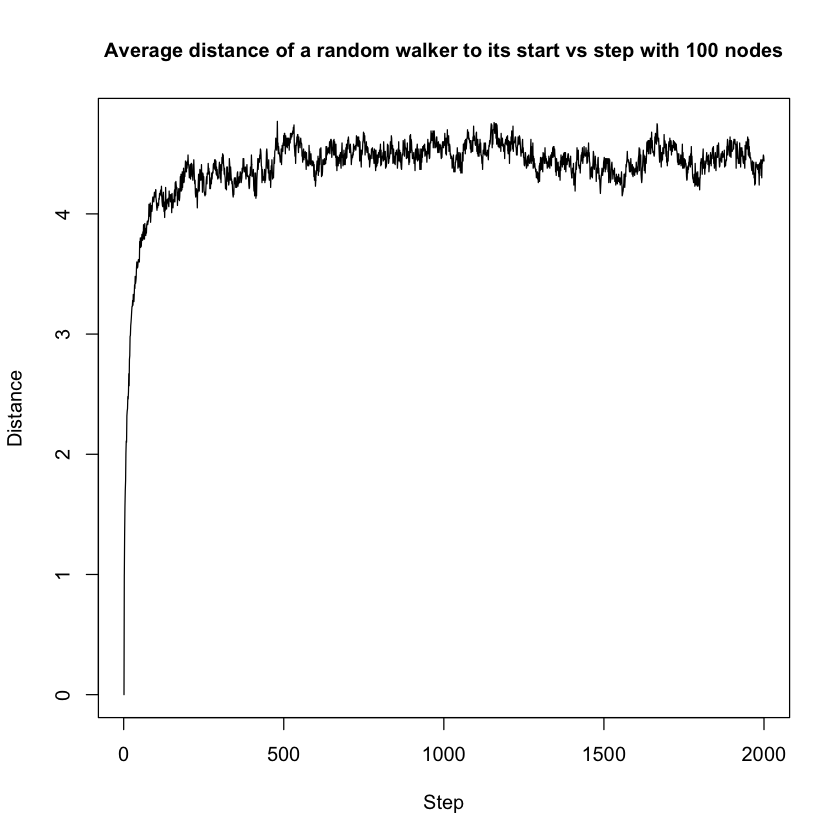

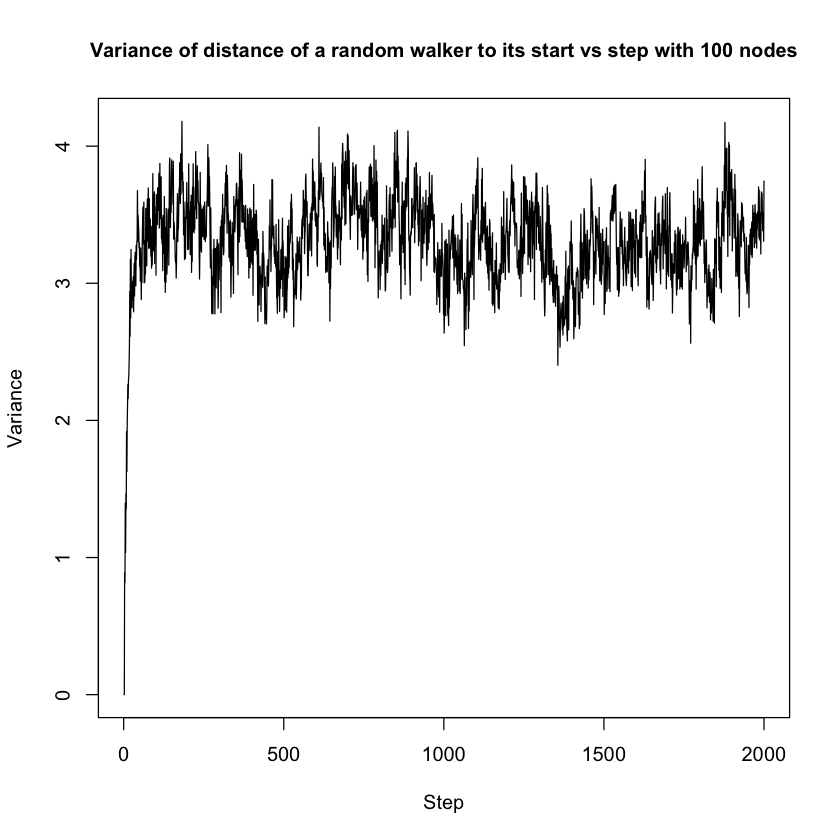

In [82]:
plot(colMeans(result_4_1),main="Average distance of a random walker to its start vs step with 100 nodes",xlab="Step",ylab="Distance",type='l',cex.main=1)
plot(colVars(result_4_1), main="Variance of distance of a random walker to its start vs step with 100 nodes",xlab="Step",ylab="Variance",type='l',cex.main=1)

In [87]:
g2_4_2 <- barabasi.game(10000, directed=F, m=1)
set.seed(1)
result_4_2 <- matrix(0, 200, 2000)
for (s in 1:200) {
    sv_2 <- sample(1:vcount(g2_4_2), 1)
    v3 <- random_walk(g2_4_2, 2000, sv_2)
    for (i in 1:2000) {
        result_4_2[s, i] = distances(g2_4_2, sv_2, v3[i])
    }
}

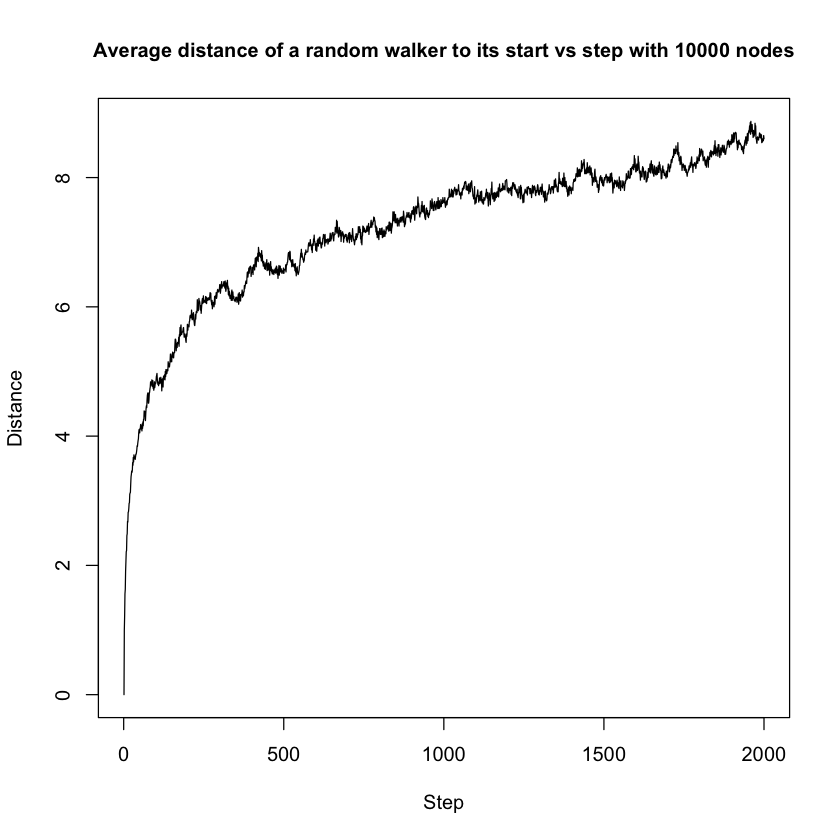

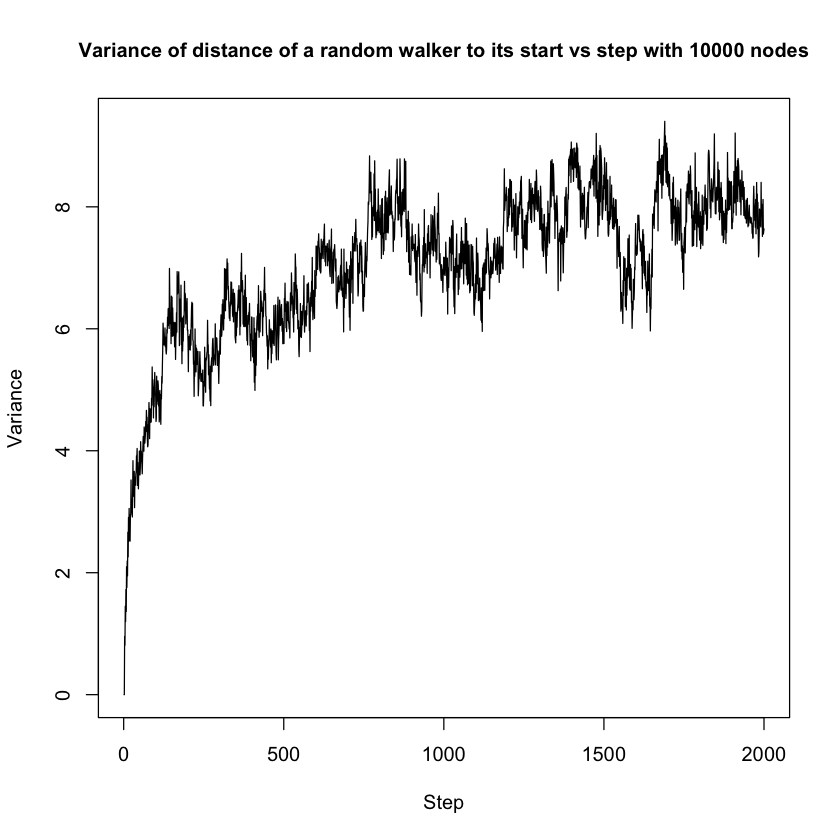

In [88]:
plot(colMeans(result_4_2),main="Average distance of a random walker to its start vs step with 10000 nodes",xlab="Step",ylab="Distance",type='l',cex.main=1)
plot(colVars(result_4_2), main="Variance of distance of a random walker to its start vs step with 10000 nodes",xlab="Step",ylab="Variance",type='l',cex.main=1)